# 생물정보학 및 실습 1 - Term Project용 Mission 2 환경 셋업

```
생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2021년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다.

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 실습용 Bioconda 환경 설치하기
실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [30]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

fatal: destination path 'colab-biolab' already exists and is not an empty directory.
./
./root/
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.condarc
./root/.profile
./root/.tmux.conf
tar: ./root: file changed as we read it
./root/.vimrc
PREFIX=/root/conda
Unpacking payload ...
Solving environment: - \ | / done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /root/conda
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [31]:
# !wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C Documents.workspace/BILAB1 -xf -

## Google Drive에 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. 1G씩 끊어지지만 자동으로 이어받아집니다.

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [32]:
# !md5sum /content/drive/MyDrive/BioLab/binfo1-datapack1/*

그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [33]:
# !wget --no-check-certificate -O /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

다루기 쉽도록 Annotation 압축을 풉니다.

In [34]:
# !gunzip /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz

In [35]:
# !ls -al /content/drive/MyDrive/BioLab/binfo*

실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [36]:
!conda install -y bedtools bioawk

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - bedtools
    - bioawk


The following NEW packages will be INSTALLED:

  bioawk             bioconda/linux-64::bioawk-1.0-h5bf99c6_6


Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done


## Mission 5

stop codon 주변에서 ribosome-protected fragment의 분포

In [37]:
%cd /content/drive/MyDrive/BioLab/binfo1-datapack1/

/content/drive/MyDrive/BioLab/binfo1-datapack1


In [38]:
!grep '	stop_codon	.*	+	.*transcript_support_level "1"' gencode.gtf | sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-stop.gtf
! head gencode-stop.gtf

chr1	HAVANA	stop_codon	4917040	4917042	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	stop_codon	4915237	4915239	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	stop_codon	4911380	4911382	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	stop_codon	4966585	4966587	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	stop_codon	5232386	5232388	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	stop_codon	5673005	5673007	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	stop_codon	5673005	5673007	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	stop_codon	6344497	6344499	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	stop_codon	6344497	6344499	.	+	0	ENSMUST00000161327.8
chr1	HAVANA	stop_codon	6344497	6344499	.	+	0	ENSMUST00000159530.2


In [39]:
!head gencode-plusexon.gtf 

chr1	HAVANA	exon	3143476	3144545	.	+	.	ENSMUST00000193812.2
chr1	ENSEMBL	exon	3172239	3172348	.	+	.	ENSMUST00000082908.3
chr1	HAVANA	exon	3322980	3323459	.	+	.	ENSMUST00000192857.2
chr1	HAVANA	exon	3536810	3536910	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3583628	3583776	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3602018	3602943	.	+	.	ENSMUST00000192183.2
chr1	HAVANA	exon	3750378	3752011	.	+	.	ENSMUST00000193244.2
chr1	HAVANA	exon	3822233	3824583	.	+	.	ENSMUST00000194454.2
chr1	HAVANA	exon	4566774	4569601	.	+	.	ENSMUST00000193450.2
chr1	HAVANA	exon	4567697	4567877	.	+	.	ENSMUST00000194935.2


In [40]:
!bedtools intersect -a gencode-stop.gtf -b gencode-plusexon.gtf -wa -wb | head

chr1	HAVANA	stop_codon	4917040	4917042	.	+	0	ENSMUST00000134384.8	chr1	HAVANA	exon	4917007	4917106	.	+	.	ENSMUST00000134384.8
chr1	HAVANA	stop_codon	4915237	4915239	.	+	0	ENSMUST00000027036.11	chr1	HAVANA	exon	4915186	4916962	.	+	.	ENSMUST00000027036.11
chr1	HAVANA	stop_codon	4915237	4915239	.	+	0	ENSMUST00000027036.11	chr1	HAVANA	exon	4915186	4915397	.	+	.	ENSMUST00000119612.9
chr1	HAVANA	stop_codon	4915237	4915239	.	+	0	ENSMUST00000027036.11	chr1	HAVANA	exon	4915186	4915575	.	+	.	ENSMUST00000115529.8
chr1	HAVANA	stop_codon	4911380	4911382	.	+	0	ENSMUST00000150971.8	chr1	HAVANA	exon	4911179	4911509	.	+	.	ENSMUST00000150971.8
chr1	HAVANA	stop_codon	4911380	4911382	.	+	0	ENSMUST00000150971.8	chr1	HAVANA	exon	4911179	4913050	.	+	.	ENSMUST00000141278.2
chr1	HAVANA	stop_codon	4966585	4966587	.	+	0	ENSMUST00000081551.14	chr1	HAVANA	exon	4966579	4968128	.	+	.	ENSMUST00000081551.14
chr1	HAVANA	stop_codon	4966585	4966587	.	+	0	ENSMUST00000081551.14	chr1	HAVANA	exon	4966579	4968132	.	+	.	ENSMUS

In [41]:
!bedtools intersect -a gencode-stop.gtf -b gencode-plusexon.gtf -wa -wb | \
 awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $5, $16; }' | \
 sort -k1,1 -k2,3n -k4,4 > gencode-exons-containing-stopcodon.bed
!head gencode-exons-containing-stopcodon.bed; tail gencode-exons-containing-stopcodon.bed

chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4915185	4916962	ENSMUST00000027036.11	4915239	+
chr1	4917006	4917106	ENSMUST00000134384.8	4917042	+
chr1	4966578	4968128	ENSMUST00000081551.14	4966587	+
chr1	5232327	5232752	ENSMUST00000044369.13	5232388	+
chr1	5672474	5673089	ENSMUST00000027038.11	5673007	+
chr1	5672474	5676354	ENSMUST00000160777.8	5673007	+
chr1	6344421	6346872	ENSMUST00000027040.13	6344499	+
chr1	6344421	6344713	ENSMUST00000159530.2	6344499	+
chr1	6344421	6345801	ENSMUST00000161327.8	6344499	+
chrY	80964301	80964527	ENSMUST00000185340.2	80964331	+
chrY	81495129	81495356	ENSMUST00000187135.2	81495159	+
chrY	82262462	82262688	ENSMUST00000185636.2	82262492	+
chrY	83068344	83068570	ENSMUST00000187165.2	83068374	+
chrY	84134537	84134763	ENSMUST00000185776.7	84134567	+
chrY	84783945	84784171	ENSMUST00000186110.2	84783975	+
chrY	86098997	86099221	ENSMUST00000188754.2	86099027	+
chrY	87153959	87154186	ENSMUST00000189543.7	87153989	+
chrY	87586734	87586960	ENSMUST00000

In [42]:
!bedtools genomecov -ibam filtered-RPF-siLuc.bam -bg -5 > stp5pcounts-RPF-siLuc.bed
!head stp5pcounts-RPF-siLuc.bed

tcmalloc: large alloc 1561239552 bytes == 0x562574a74000 @  0x7f0432ddf887 0x5625732f9fea 0x5625732fe6fd 0x5625732ff33f 0x5625732f78a9 0x5625732ab773 0x7f0432409bf7 0x5625732b3569
tcmalloc: large alloc 1454047232 bytes == 0x562574a74000 @  0x7f0432ddf887 0x5625732f9fea 0x5625732fe6fd 0x5625732ff33f 0x5625732f78a9 0x5625732ab773 0x7f0432409bf7 0x5625732b3569
chr1	3176534	3176535	1
chr1	3196256	3196257	1
chr1	3221526	3221527	1
chr1	3221542	3221543	2
chr1	3221545	3221546	3
chr1	3221546	3221547	2
chr1	3221548	3221550	1
chr1	3221571	3221572	1
chr1	3221897	3221898	1
chr1	3221994	3221995	1


In [43]:
!head gencode-exons-containing-stopcodon.bed

chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4915185	4916962	ENSMUST00000027036.11	4915239	+
chr1	4917006	4917106	ENSMUST00000134384.8	4917042	+
chr1	4966578	4968128	ENSMUST00000081551.14	4966587	+
chr1	5232327	5232752	ENSMUST00000044369.13	5232388	+
chr1	5672474	5673089	ENSMUST00000027038.11	5673007	+
chr1	5672474	5676354	ENSMUST00000160777.8	5673007	+
chr1	6344421	6346872	ENSMUST00000027040.13	6344499	+
chr1	6344421	6344713	ENSMUST00000159530.2	6344499	+
chr1	6344421	6345801	ENSMUST00000161327.8	6344499	+


In [44]:
!head stp5pcounts-RPF-siLuc.bed

chr1	3176534	3176535	1
chr1	3196256	3196257	1
chr1	3221526	3221527	1
chr1	3221542	3221543	2
chr1	3221545	3221546	3
chr1	3221546	3221547	2
chr1	3221548	3221550	1
chr1	3221571	3221572	1
chr1	3221897	3221898	1
chr1	3221994	3221995	1


In [45]:
!bedtools intersect -a stp5pcounts-RPF-siLuc.bed -b gencode-exons-containing-stopcodon.bed -wa -wb -nonamecheck > stp5pcounts-filtered-RPF-siLuc.txt
!head stp5pcounts-filtered-RPF-siLuc.txt

chr1	4911178	4911179	1	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911181	4911182	2	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911182	4911184	1	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911186	4911188	1	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911189	4911190	6	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911190	4911191	8	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911192	4911193	1	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911193	4911194	2	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911195	4911196	3	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911196	4911197	2	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
def drawPlot(x,y,title):
  plt.title('Ribosome footprint density near stop codon', pad=10)
  plt.ylabel(title, labelpad=10)
  plt.bar(x, y, width=0.3)
  plt.axvline(x=0, color='r', linestyle='-', linewidth=0.3)
  plt.show()

In [47]:
pd.read_csv('stp5pcounts-filtered-RPF-siLuc.txt', header=None, sep='\t')

,0,1,2,3,4,5,6,7,8,9
0,chr1,4911178,4911179,1,chr1,4911178,4911509,ENSMUST00000150971.8,4911382,+
1,chr1,4911181,4911182,2,chr1,4911178,4911509,ENSMUST00000150971.8,4911382,+
2,chr1,4911182,4911184,1,chr1,4911178,4911509,ENSMUST00000150971.8,4911382,+
3,chr1,4911186,4911188,1,chr1,4911178,4911509,ENSMUST00000150971.8,4911382,+
4,chr1,4911189,4911190,6,chr1,4911178,4911509,ENSMUST00000150971.8,4911382,+
...,...,...,...,...,...,...,...,...,...,...
256525,chrY,1028220,1028221,2,chrY,1028187,1028594,ENSMUST00000091197.4,1028251,+
256526,chrY,6268723,6268724,1,chrY,6268584,6269548,ENSMUST00000187857.2,6269423,+
256527,chrY,13254007,13254008,1,chrY,13253868,13254834,ENSMUST00000192749.2,13254707,+
256528,chrY,13377978,13377979,1,chrY,13377839,13378804,ENSMUST00000192204.2,13378678,+


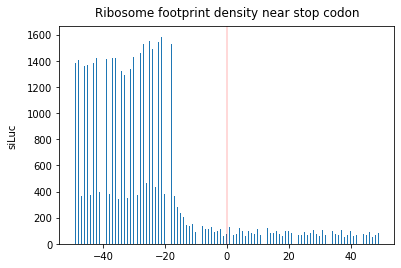

In [48]:
df = pd.read_csv('stp5pcounts-filtered-RPF-siLuc.txt', header=None, sep='\t')
df['relativePos'] = df.apply(lambda x: x[1]-x[8] , axis=1)
temp = df[df.relativePos.apply(lambda x: abs(x)<50)].groupby('relativePos').count()[0]
plotDF = pd.DataFrame({'cnt':[int(i) for i in temp.values] , 'relativePos':[int(i) for i in temp.index]})
drawPlot(plotDF.relativePos, plotDF.cnt, 'siLuc')

In [49]:
# read의 3' end 위치를 셉니다
!bedtools genomecov -ibam filtered-RPF-siLin28a.bam -bg -5 > stp5pcounts-RPF-siLin28a.bed
!head stp5pcounts-RPF-siLin28a.bed

tcmalloc: large alloc 1561239552 bytes == 0x5627aaad8000 @  0x7ffa81772887 0x5627a980ffea 0x5627a98146fd 0x5627a981533f 0x5627a980d8a9 0x5627a97c1773 0x7ffa80d9cbf7 0x5627a97c9569
tcmalloc: large alloc 1454047232 bytes == 0x5627aaad8000 @  0x7ffa81772887 0x5627a980ffea 0x5627a98146fd 0x5627a981533f 0x5627a980d8a9 0x5627a97c1773 0x7ffa80d9cbf7 0x5627a97c9569
chr1	3123359	3123360	1
chr1	3124284	3124285	1
chr1	3188296	3188297	1
chr1	3221546	3221547	1
chr1	3221549	3221550	2
chr1	3221868	3221869	1
chr1	3222153	3222154	1
chr1	3222413	3222415	1
chr1	3222638	3222639	1
chr1	3224556	3224557	1


In [50]:
# 그렇게 match 된 것들 중에 앞에서 찾은 start codon을 포함한 exon과 겹치는 것만 골라냅니다.
!bedtools intersect -a stp5pcounts-RPF-siLin28a.bed -b gencode-exons-containing-stopcodon.bed -wa -wb -nonamecheck > stp5pcounts-filtered-RPF-siLin28a.txt
!head stp5pcounts-filtered-RPF-siLin28a.txt

chr1	4911180	4911181	1	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911181	4911182	2	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911184	4911185	2	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911185	4911186	1	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911187	4911188	2	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911189	4911190	1	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911190	4911191	8	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911191	4911192	1	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911192	4911193	3	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+
chr1	4911195	4911196	3	chr1	4911178	4911509	ENSMUST00000150971.8	4911382	+


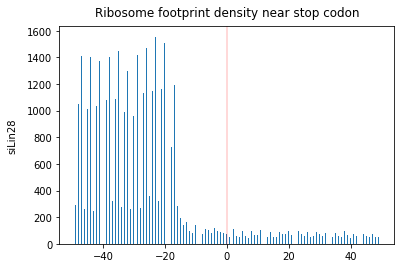

In [51]:
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('stp5pcounts-filtered-RPF-siLin28a.txt', header=None, sep='\t')
df['relativePos'] = df.apply(lambda x: x[2]-x[8] , axis=1)

temp = df[df.relativePos.apply(lambda x: abs(x)<50)].groupby('relativePos').count()[0]
plotDF = pd.DataFrame({'cnt':[int(i) for i in temp.values] , 'relativePos':[int(i) for i in temp.index]})
drawPlot(plotDF.relativePos, plotDF.cnt, 'siLin28')